In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
pd.options.display.float_format = '{:}'.format

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

path = '../csv/상주인구-행정동.csv'
raw  = pd.read_csv(path, encoding='cp949')

In [42]:
df = pd.DataFrame(data=raw)
df.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,...,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수
0,20191,11680510,신사동,17636,8175,9461,2884,2438,2775,3228,...,1725,1405,1320,1583,1760,1283,2110,7539,3239,4300
1,20191,11680521,논현1동,23372,10816,12556,1850,4383,6315,3878,...,1817,919,2474,3439,1956,1495,2273,14027,766,13261
2,20191,11680531,논현2동,21749,10202,11547,2684,3343,4939,3794,...,1875,1273,1818,2748,1931,1469,2308,11051,2048,9003
3,20191,11680545,압구정동,27906,12879,15027,5356,3292,3876,5180,...,2848,2759,1727,2227,2779,2001,3534,10679,7806,2873
4,20191,11680565,청담동,29383,13790,15593,4962,4139,4920,5219,...,2603,2347,2167,2807,2790,2352,3130,12004,4134,7870


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   기준_년분기_코드           380 non-null    int64 
 1   행정동_코드              380 non-null    int64 
 2   행정동_코드_명            380 non-null    object
 3   총_상주인구_수            380 non-null    int64 
 4   남성_상주인구_수           380 non-null    int64 
 5   여성_상주인구_수           380 non-null    int64 
 6   연령대_10_상주인구_수       380 non-null    int64 
 7   연령대_20_상주인구_수       380 non-null    int64 
 8   연령대_30_상주인구_수       380 non-null    int64 
 9   연령대_40_상주인구_수       380 non-null    int64 
 10  연령대_50_상주인구_수       380 non-null    int64 
 11  연령대_60_이상_상주인구_수    380 non-null    int64 
 12  남성연령대_10_상주인구_수     380 non-null    int64 
 13  남성연령대_20_상주인구_수     380 non-null    int64 
 14  남성연령대_30_상주인구_수     380 non-null    int64 
 15  남성연령대_40_상주인구_수     380 non-null    int64 
 16  남성연령대_50_상주인구_수     380 no

In [44]:
# 결측치 확인
df.isnull().sum()

기준_년분기_코드             0
행정동_코드                0
행정동_코드_명              0
총_상주인구_수              0
남성_상주인구_수             0
여성_상주인구_수             0
연령대_10_상주인구_수         0
연령대_20_상주인구_수         0
연령대_30_상주인구_수         0
연령대_40_상주인구_수         0
연령대_50_상주인구_수         0
연령대_60_이상_상주인구_수      0
남성연령대_10_상주인구_수       0
남성연령대_20_상주인구_수       0
남성연령대_30_상주인구_수       0
남성연령대_40_상주인구_수       0
남성연령대_50_상주인구_수       0
남성연령대_60_이상_상주인구_수    0
여성연령대_10_상주인구_수       0
여성연령대_20_상주인구_수       0
여성연령대_30_상주인구_수       0
여성연령대_40_상주인구_수       0
여성연령대_50_상주인구_수       0
여성연령대_60_이상_상주인구_수    0
총_가구_수                0
아파트_가구_수              0
비_아파트_가구_수            0
dtype: int64

In [45]:
raw = df.copy()

In [46]:
# 23년도 분기만 모아놓기

rw = raw['기준_년분기_코드'].isin([20231,20232,20233])

상주인구 = raw[rw]

In [47]:

replace_dict = {
    '신사동': '신사동',
    '논현1동': '논현동',
    '논현2동': '논현동',
    '압구정동': '압구정동',
    '개포4동' : '개포동',
    '개포1동' : '개포동',
    '개포2동' : '개포동',
    '일원1동' : '일원동',
    '삼성1동' : '삼성동',
    '삼성2동' : '삼성동',
    '대치1동' : '대치동',
    '대치2동' : '대치동',
    '대치4동' : '대치동',
    '역삼1동' : '역삼동',
    '역삼2동' : '역삼동',
    '도곡1동' : '도곡동',
    '도곡2동' : '도곡동',
    '수서동' : '수서동'
}

상주인구.loc[:, '행정동_코드_명'] = 상주인구['행정동_코드_명'].replace(replace_dict)

In [48]:
상주인구

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,...,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수
260,20231,11680510,신사동,18137,8472,9665,2230,2121,2768,3104,...,2216,1072,1056,1575,1732,1594,2636,7476,0,7476
261,20231,11680521,논현동,23747,10982,12765,1598,1819,6239,5414,...,2459,804,946,3507,2887,1592,3029,13776,0,13776
262,20231,11680531,논현동,21289,9978,11311,2207,1914,4273,4501,...,2451,1080,910,2475,2421,1571,2854,10305,0,10305
263,20231,11680545,압구정동,28557,13258,15299,4370,3214,3441,4765,...,3605,2190,1643,1911,2665,2505,4385,10627,0,10627
264,20231,11680565,청담동,30253,14353,15900,4122,3496,4561,5329,...,3573,1955,1632,2519,2921,2649,4224,11870,0,11870
265,20231,11680580,삼성동,12969,6444,6525,1536,1706,1937,2050,...,1651,735,651,996,1104,1201,1838,4969,0,4969
266,20231,11680590,삼성동,29555,14126,15429,4404,3483,4429,6173,...,2660,2076,1540,2519,3539,2628,3127,12693,0,12693
267,20231,11680600,대치동,24865,12437,12428,4090,5027,2014,3011,...,2334,1817,2301,1075,1840,3052,2343,7201,0,7201
268,20231,11680610,대치동,40398,20450,19948,4638,8163,4534,4366,...,4731,2039,3452,2262,2598,4903,4694,12849,0,12849
269,20231,11680630,대치동,20756,9812,10944,1732,3513,3550,3669,...,1864,806,1680,1986,2076,2301,2095,9779,0,9779


In [49]:
상주인구.columns

Index(['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '총_상주인구_수', '남성_상주인구_수', '여성_상주인구_수',
       '연령대_10_상주인구_수', '연령대_20_상주인구_수', '연령대_30_상주인구_수', '연령대_40_상주인구_수',
       '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수', '남성연령대_10_상주인구_수',
       '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수', '남성연령대_40_상주인구_수',
       '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수', '여성연령대_10_상주인구_수',
       '여성연령대_20_상주인구_수', '여성연령대_30_상주인구_수', '여성연령대_40_상주인구_수',
       '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수', '총_가구_수', '아파트_가구_수',
       '비_아파트_가구_수'],
      dtype='object')

In [50]:
s_p = ['총_상주인구_수', '남성_상주인구_수', '여성_상주인구_수']
age_p = ['연령대_10_상주인구_수', '연령대_20_상주인구_수', '연령대_30_상주인구_수', '연령대_40_상주인구_수',
       '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수']
m_a_p = ['남성연령대_10_상주인구_수',
       '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수', '남성연령대_40_상주인구_수',
       '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수']
fe_m_p = ['여성연령대_10_상주인구_수',
       '여성연령대_20_상주인구_수', '여성연령대_30_상주인구_수', '여성연령대_40_상주인구_수',
       '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수']
fm_p = ['총_가구_수', '아파트_가구_수',
       '비_아파트_가구_수']


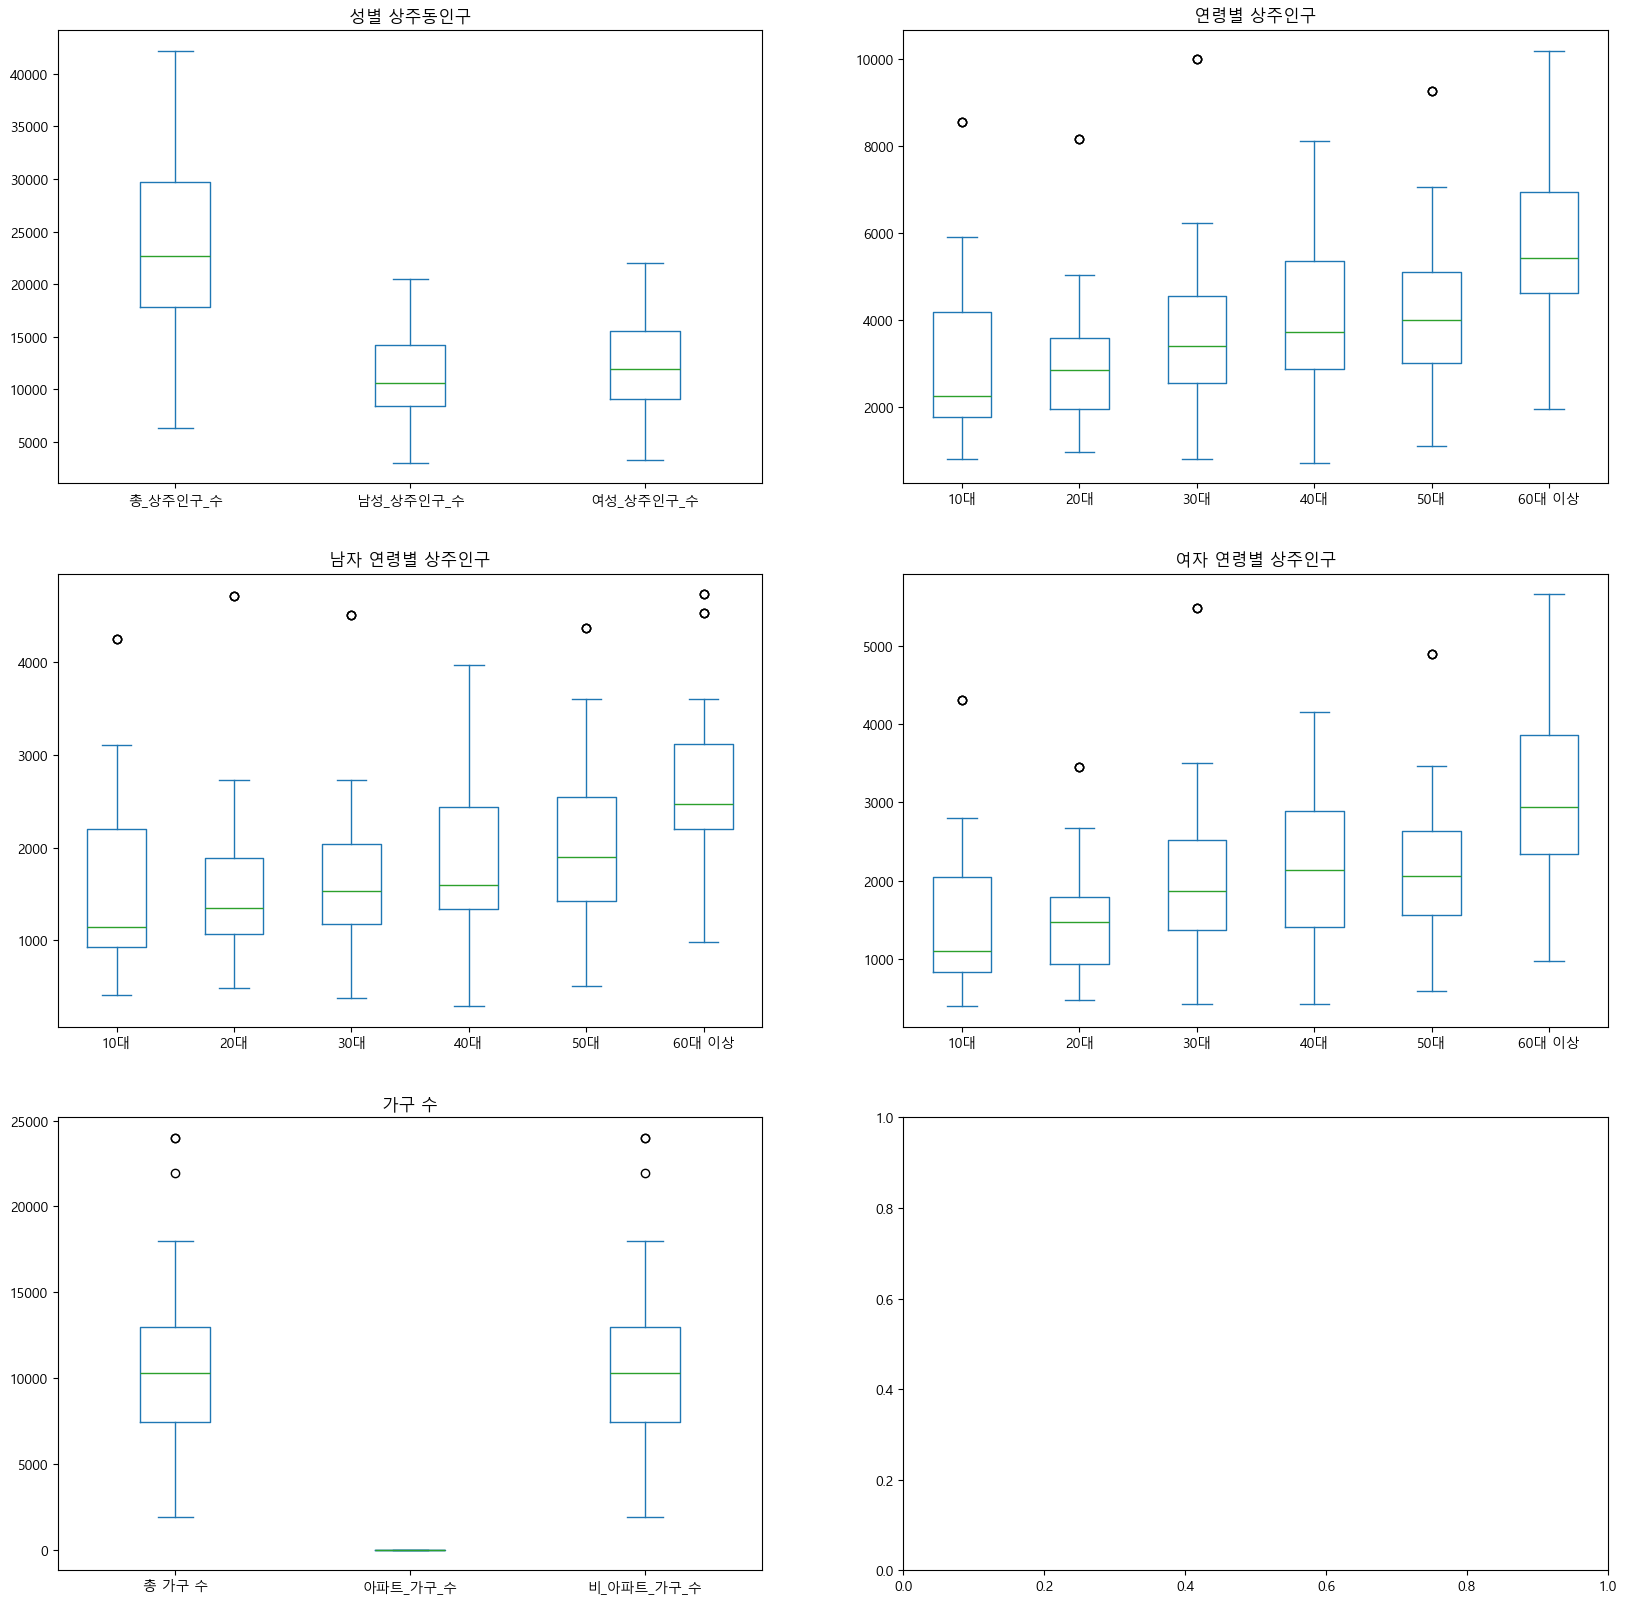

In [51]:
# 이상치 제거 전 boxplot 확인

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

상주인구[s_p].plot.box(ax=axes[0,0], title='성별 상주동인구')
상주인구[age_p].plot.box(ax=axes[0,1], title='연령별 상주인구')
상주인구[m_a_p].plot.box(ax=axes[1,0], title='남자 연령별 상주인구')
상주인구[fe_m_p].plot.box(ax=axes[1,1], title='여자 연령별 상주인구')
상주인구[fm_p].plot.box(ax=axes[2,0], title='가구 수')


label_b = ['10대', '20대','30대','40대','50대','60대 이상']
label_c = ['10대', '20대','30대','40대','50대','60대 이상']
label_d = ['10대', '20대','30대','40대','50대','60대 이상']
label_e = ['총 가구 수','아파트_가구_수','비_아파트_가구_수']

axes[0,1].set_xticklabels(label_b,fontsize=10)
axes[1,0].set_xticklabels(label_c,fontsize=10)
axes[1,1].set_xticklabels(label_d,fontsize=10)
axes[2,0].set_xticklabels(label_e,fontsize=10)

plt.show()

In [52]:
# 거주인구에 대해서 이상치를 없앤다면, 동네별 상권 분석하는 의미가 있을까??

## 시각화 하기전, 그룹화

In [53]:
상주인구.reset_index(drop=True, inplace=True)

상주인구.loc[1,'행정동_코드_명']

'논현동'

In [54]:
상주인구['행정동_코드_명'].unique()
상주인구['행정동_코드_명'].unique()

array(['신사동', '논현동', '압구정동', '청담동', '삼성동', '대치동', '역삼동', '도곡동', '개포동',
       '세곡동', '일원동', '수서동'], dtype=object)

In [55]:
## ## 행정동_코드_명 >> 행정동

상주인구_copy = 상주인구.copy()
상주인구_copy['행정동'] = 상주인구_copy['행정동_코드_명']

In [56]:
# 같은 동끼리 그룹화 해서 정렬

leng = len(상주인구_copy['행정동'].unique())
unique_values = 상주인구_copy['행정동'].unique()

group_data = []

for i in range(leng):
    pp_data = 상주인구_copy[상주인구_copy['행정동'] == unique_values[i]]

    s_populaion = pp_data.groupby(['행정동','기준_년분기_코드']).mean(numeric_only=True)

    group_data.append(s_populaion)



grouped_data = pd.concat(group_data)

# 결과 확인
grouped_data

행정동_코드           총_상주인구_수         남성_상주인구_수  \
행정동  기준_년분기_코드                                                           
신사동  20231             11680510.0            18137.0            8472.0   
     20232             11680510.0            18137.0            8472.0   
     20233             11680510.0            18137.0            8472.0   
논현동  20231             11680526.0            22518.0           10480.0   
     20232             11680526.0            22518.0           10480.0   
     20233             11680526.0            22518.0           10480.0   
압구정동 20231             11680545.0            28557.0           13258.0   
     20232             11680545.0            28557.0           13258.0   
     20233             11680545.0            28557.0           13258.0   
청담동  20231             11680565.0            30253.0           14353.0   
     20232             11680565.0            30253.0           14353.0   
     20233             11680565.0            30253.0           14353.0   
삼성동  20231             11680585.0            21262.0           10285.0   
     20232             11680585.0            21262.0           10285.0   
     20233             11680585.0            21262.0           10285.0   
대치동  20231     11680613.333333334            28673.0           14233.0   
     20232     11680613.333333334            28673.0           14233.0   
     20233     11680613.333333334            28673.0           14233.0   
역삼동  20231             11680645.0            35761.0           17002.5   
     20232             11680645.0            35761.0           17002.5   
     20233             11680645.0            35761.0           17002.5   
도곡동  20231             11680655.5            22891.0           10745.0   
     20232             11680655.5            22891.0           10745.0   
     20233             11680655.5            22891.0           10745.0   
개포동  20231     11680673.333333334 12844.333333333334 6284.666666666667   
     20232     11680673.333333334 12844.333333333334 6284.666666666667   
     20233     11680673.333333334 12844.333333333334 6284.666666666667   
세곡동  20231             11680700.0            42164.0           20181.0   
     20232             11680700.0            42164.0           20181.0   
     20233             11680700.0            42164.0           20181.0   
일원동  20231             11680730.0            17211.0            8427.0   
     20232             11680730.0            17211.0            8427.0   
     20233             11680730.0            17211.0            8427.0   
수서동  20231             11680750.0            16178.0            7412.0   
     20232             11680750.0            16178.0            7412.0   
     20233             11680750.0            16178.0            7412.0   

                       여성_상주인구_수      연령대_10_상주인구_수      연령대_20_상주인구_수  \
행정동  기준_년분기_코드                                                           
신사동  20231                9665.0             2230.0             2121.0   
     20232                9665.0             2230.0             2121.0   
     20233                9665.0             2230.0             2121.0   
논현동  20231               12038.0             1902.5             1866.5   
     20232               12038.0             1902.5             1866.5   
     20233               12038.0             1902.5             1866.5   
압구정동 20231               15299.0             4370.0             3214.0   
     20232               15299.0             4370.0             3214.0   
     20233               15299.0             4370.0             3214.0   
청담동  20231               15900.0             4122.0             3496.0   
     20232               15900.0             4122.0             3496.0   
     20233               15900.0             4122.0             3496.0   
삼성동  20231               10977.0             2970.0             2594.5   
     20232               10977.0             2970.0             2594.5   
     20233               10977

In [57]:
상주인구.columns

Index(['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '총_상주인구_수', '남성_상주인구_수', '여성_상주인구_수',
       '연령대_10_상주인구_수', '연령대_20_상주인구_수', '연령대_30_상주인구_수', '연령대_40_상주인구_수',
       '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수', '남성연령대_10_상주인구_수',
       '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수', '남성연령대_40_상주인구_수',
       '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수', '여성연령대_10_상주인구_수',
       '여성연령대_20_상주인구_수', '여성연령대_30_상주인구_수', '여성연령대_40_상주인구_수',
       '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수', '총_가구_수', '아파트_가구_수',
       '비_아파트_가구_수'],
      dtype='object')

In [58]:
# 동에 관한 값을 반환하는 함수

def find_dongs(x):
    dong = grouped_data[grouped_data.index.get_level_values('행정동') == x]
    return dong

In [59]:
# find_dongs('수서동')

## 시각화

In [60]:
# 동을 찾는 함수

def find_dong(x):
    dong_data = []
    for dong_name in x:
        dong_data.append(grouped_data[grouped_data.index.get_level_values('행정동') == dong_name])
    return dong_data

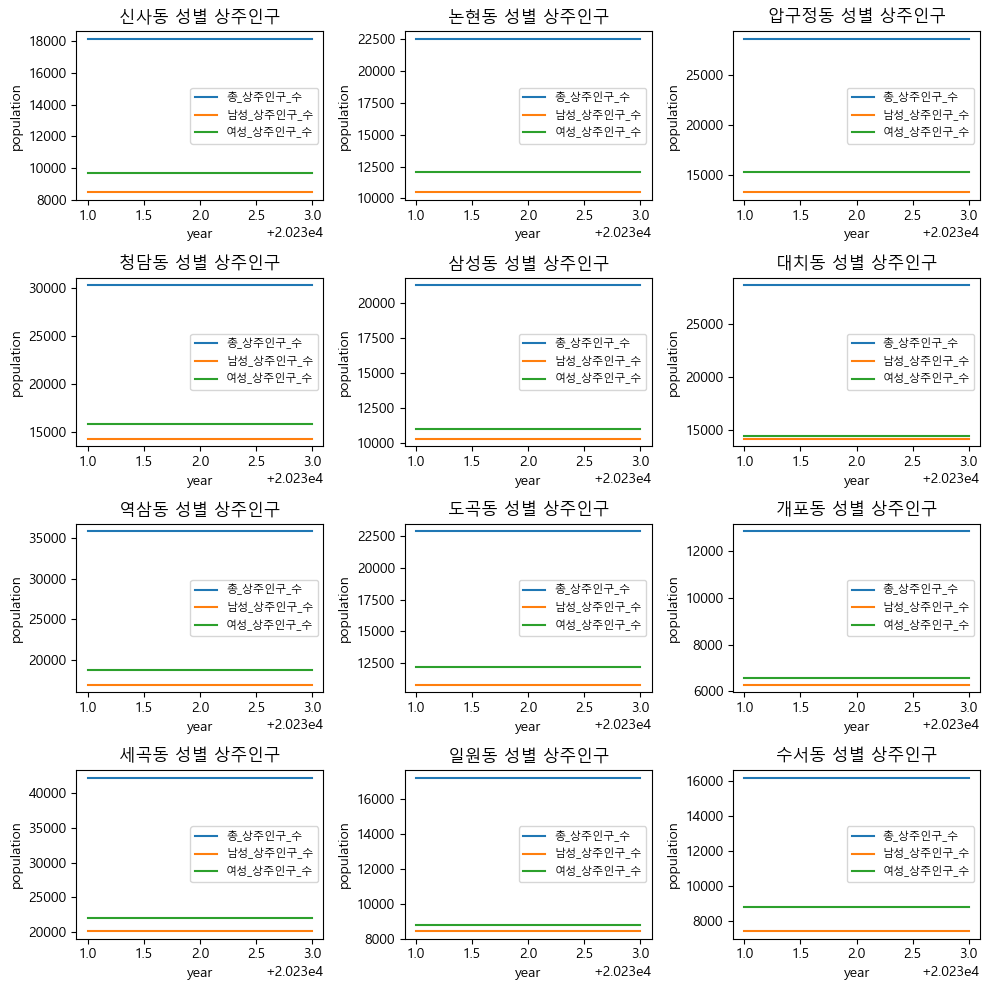

In [61]:
# 성별 상주인구 그래프



fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

dong_n = ['신사동', '논현동', '압구정동', '청담동', '삼성동', '대치동', '역삼동', '도곡동', '개포동', '세곡동',
       '일원동', '수서동']
    
    
for i, dong_data in enumerate(find_dong(dong_n)):
    row = i // 3
    col = i % 3
    
    name = dong_data.index.get_level_values('행정동')[0]
    
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['총_상주인구_수'], label='총_상주인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['남성_상주인구_수'], label='남성_상주인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['여성_상주인구_수'], label='여성_상주인구_수')

    axes[row, col].set_title(name + ' 성별 상주인구')
    axes[row, col].set_xlabel('year')
    axes[row, col].set_ylabel('population')
    axes[row, col].legend(loc='best', fontsize=8, fancybox=True)
    
plt.tight_layout()
plt.show()

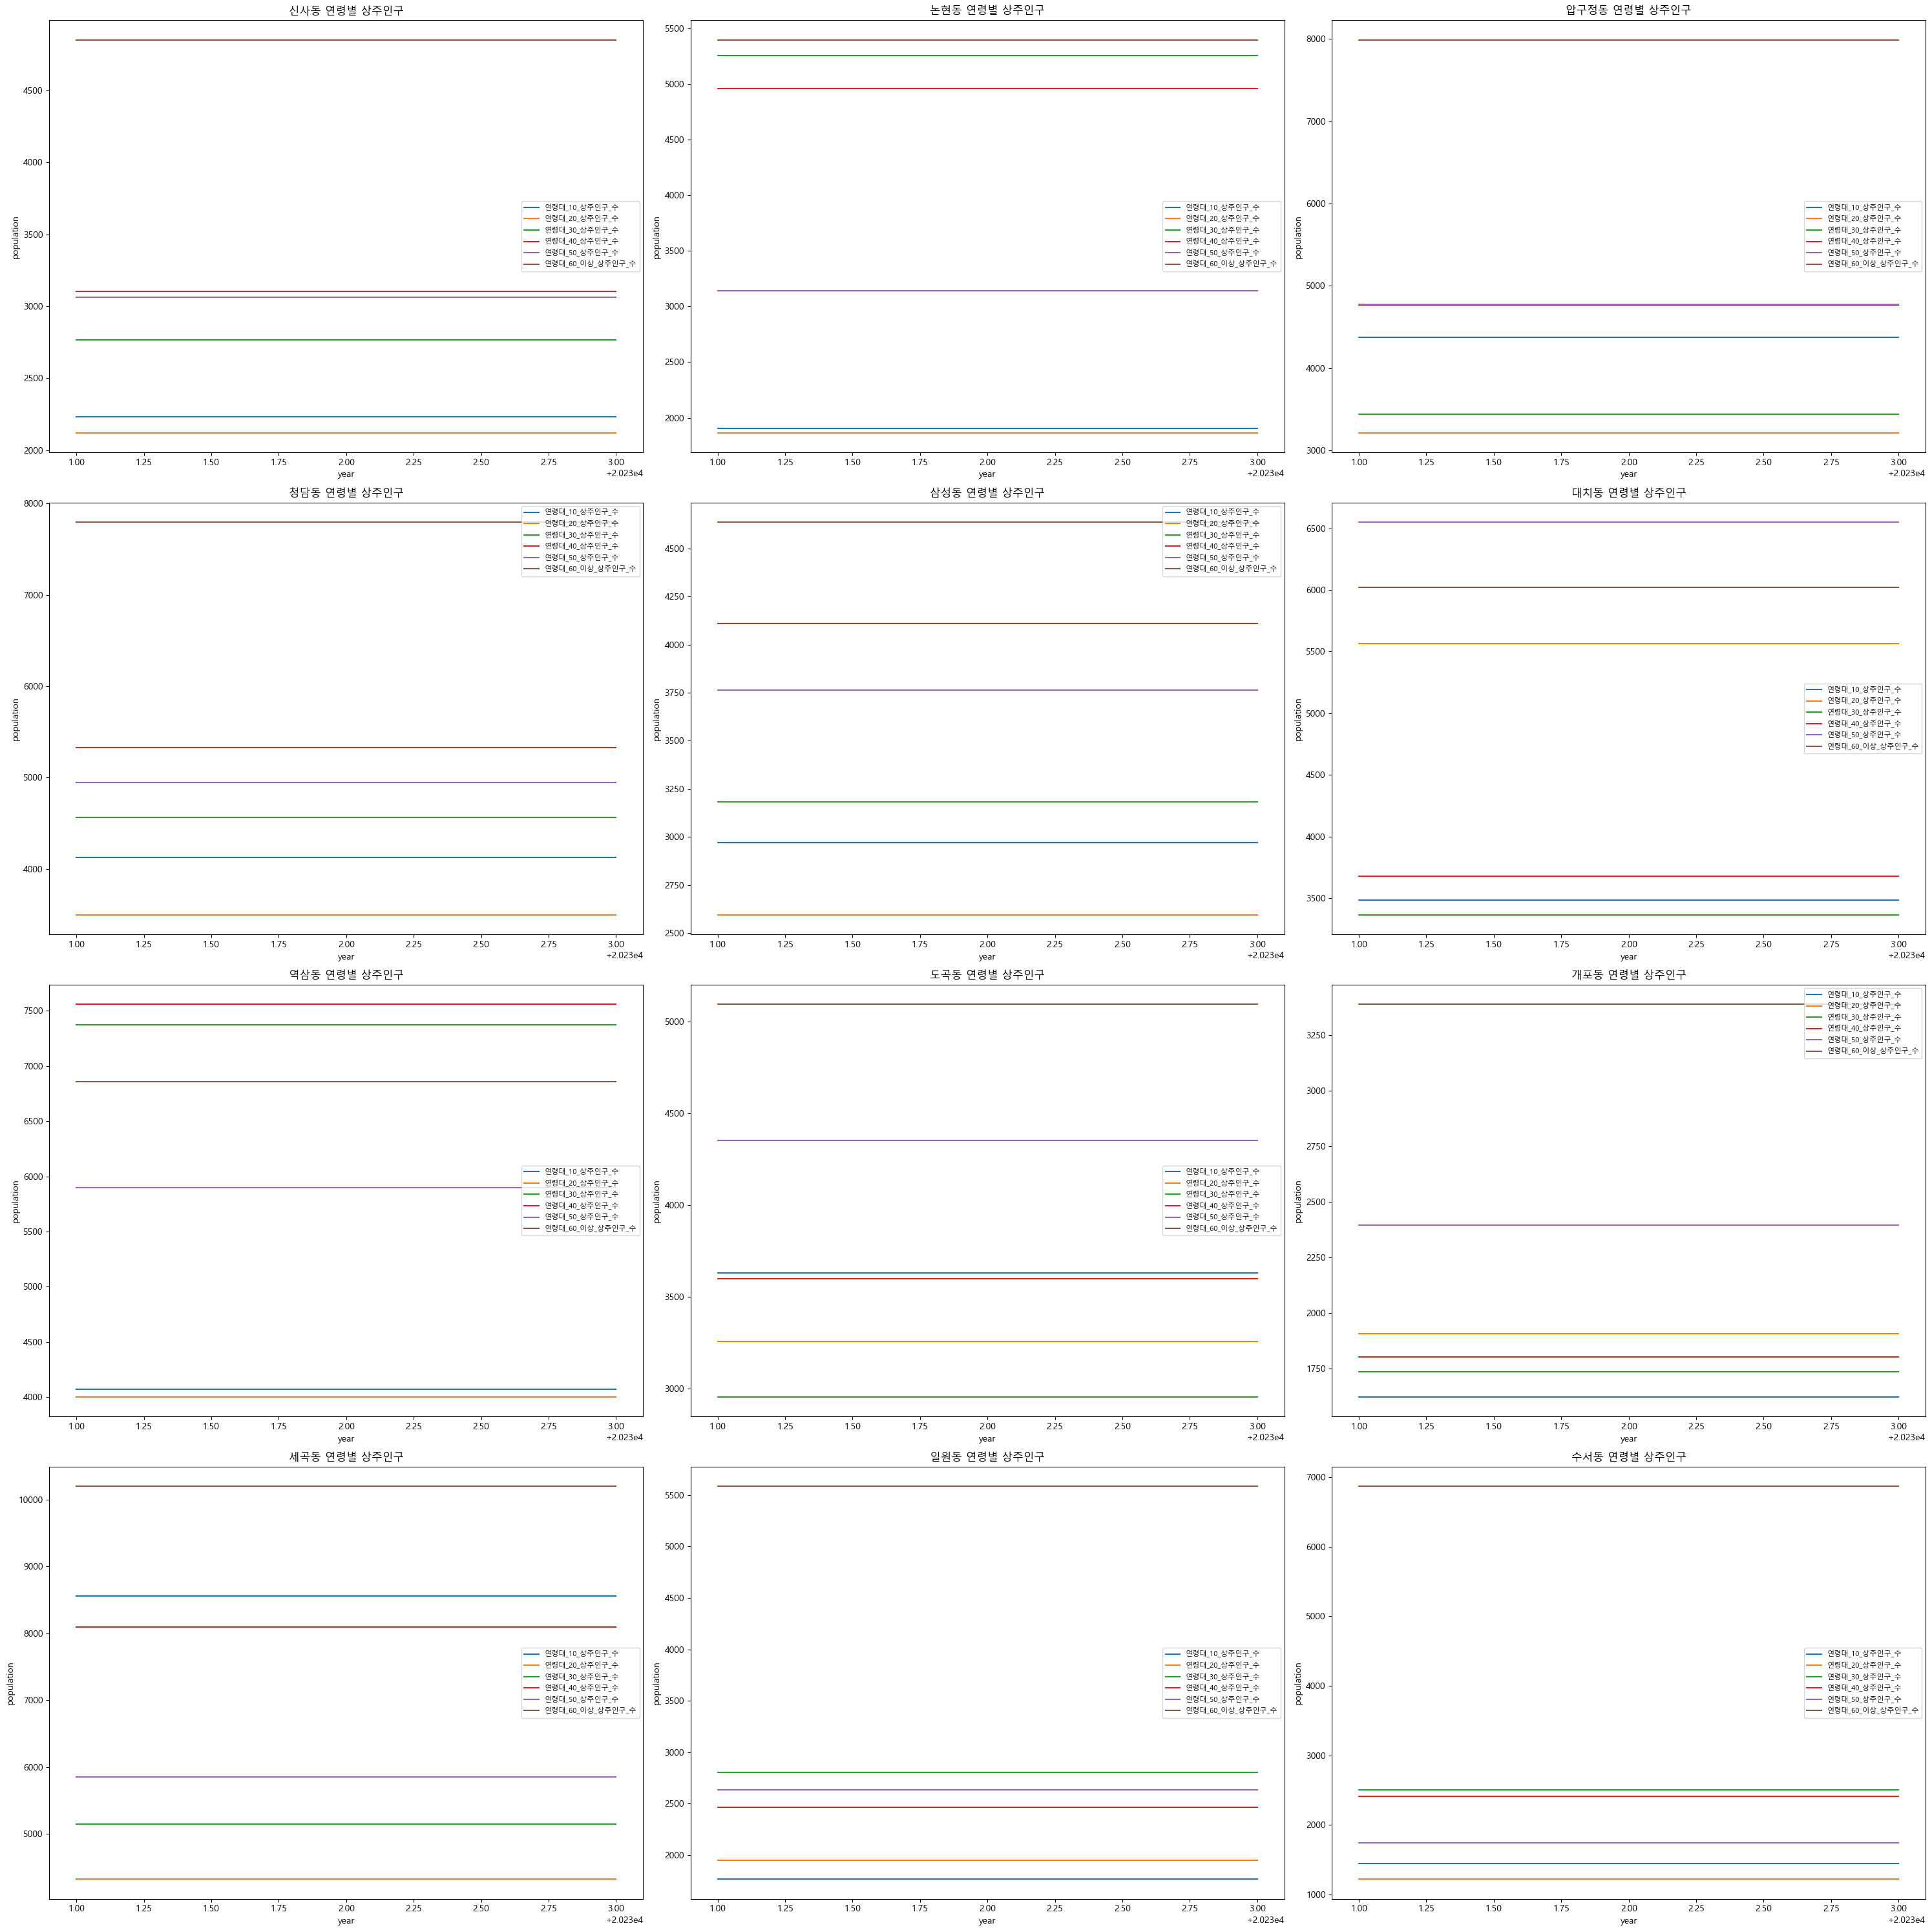

In [62]:
# 연령별 상주인구 그래프



fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30, 30))

dong_n = ['신사동', '논현동', '압구정동', '청담동', '삼성동', '대치동', '역삼동', '도곡동', '개포동', '세곡동',
       '일원동', '수서동']
    
    
for i, dong_data in enumerate(find_dong(dong_n)):
    row = i // 3
    col = i % 3
    
    name = dong_data.index.get_level_values('행정동')[0]
    
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['연령대_10_상주인구_수'], label='연령대_10_상주인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['연령대_20_상주인구_수'], label='연령대_20_상주인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['연령대_30_상주인구_수'], label='연령대_30_상주인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['연령대_40_상주인구_수'], label='연령대_40_상주인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['연령대_50_상주인구_수'], label='연령대_50_상주인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['연령대_60_이상_상주인구_수'], label='연령대_60_이상_상주인구_수')

    axes[row, col].set_title(name + ' 연령별 상주인구')
    axes[row, col].set_xlabel('year')
    axes[row, col].set_ylabel('population')
    axes[row, col].legend(loc='best', fontsize=8, fancybox=True)
    
plt.tight_layout()
plt.show()

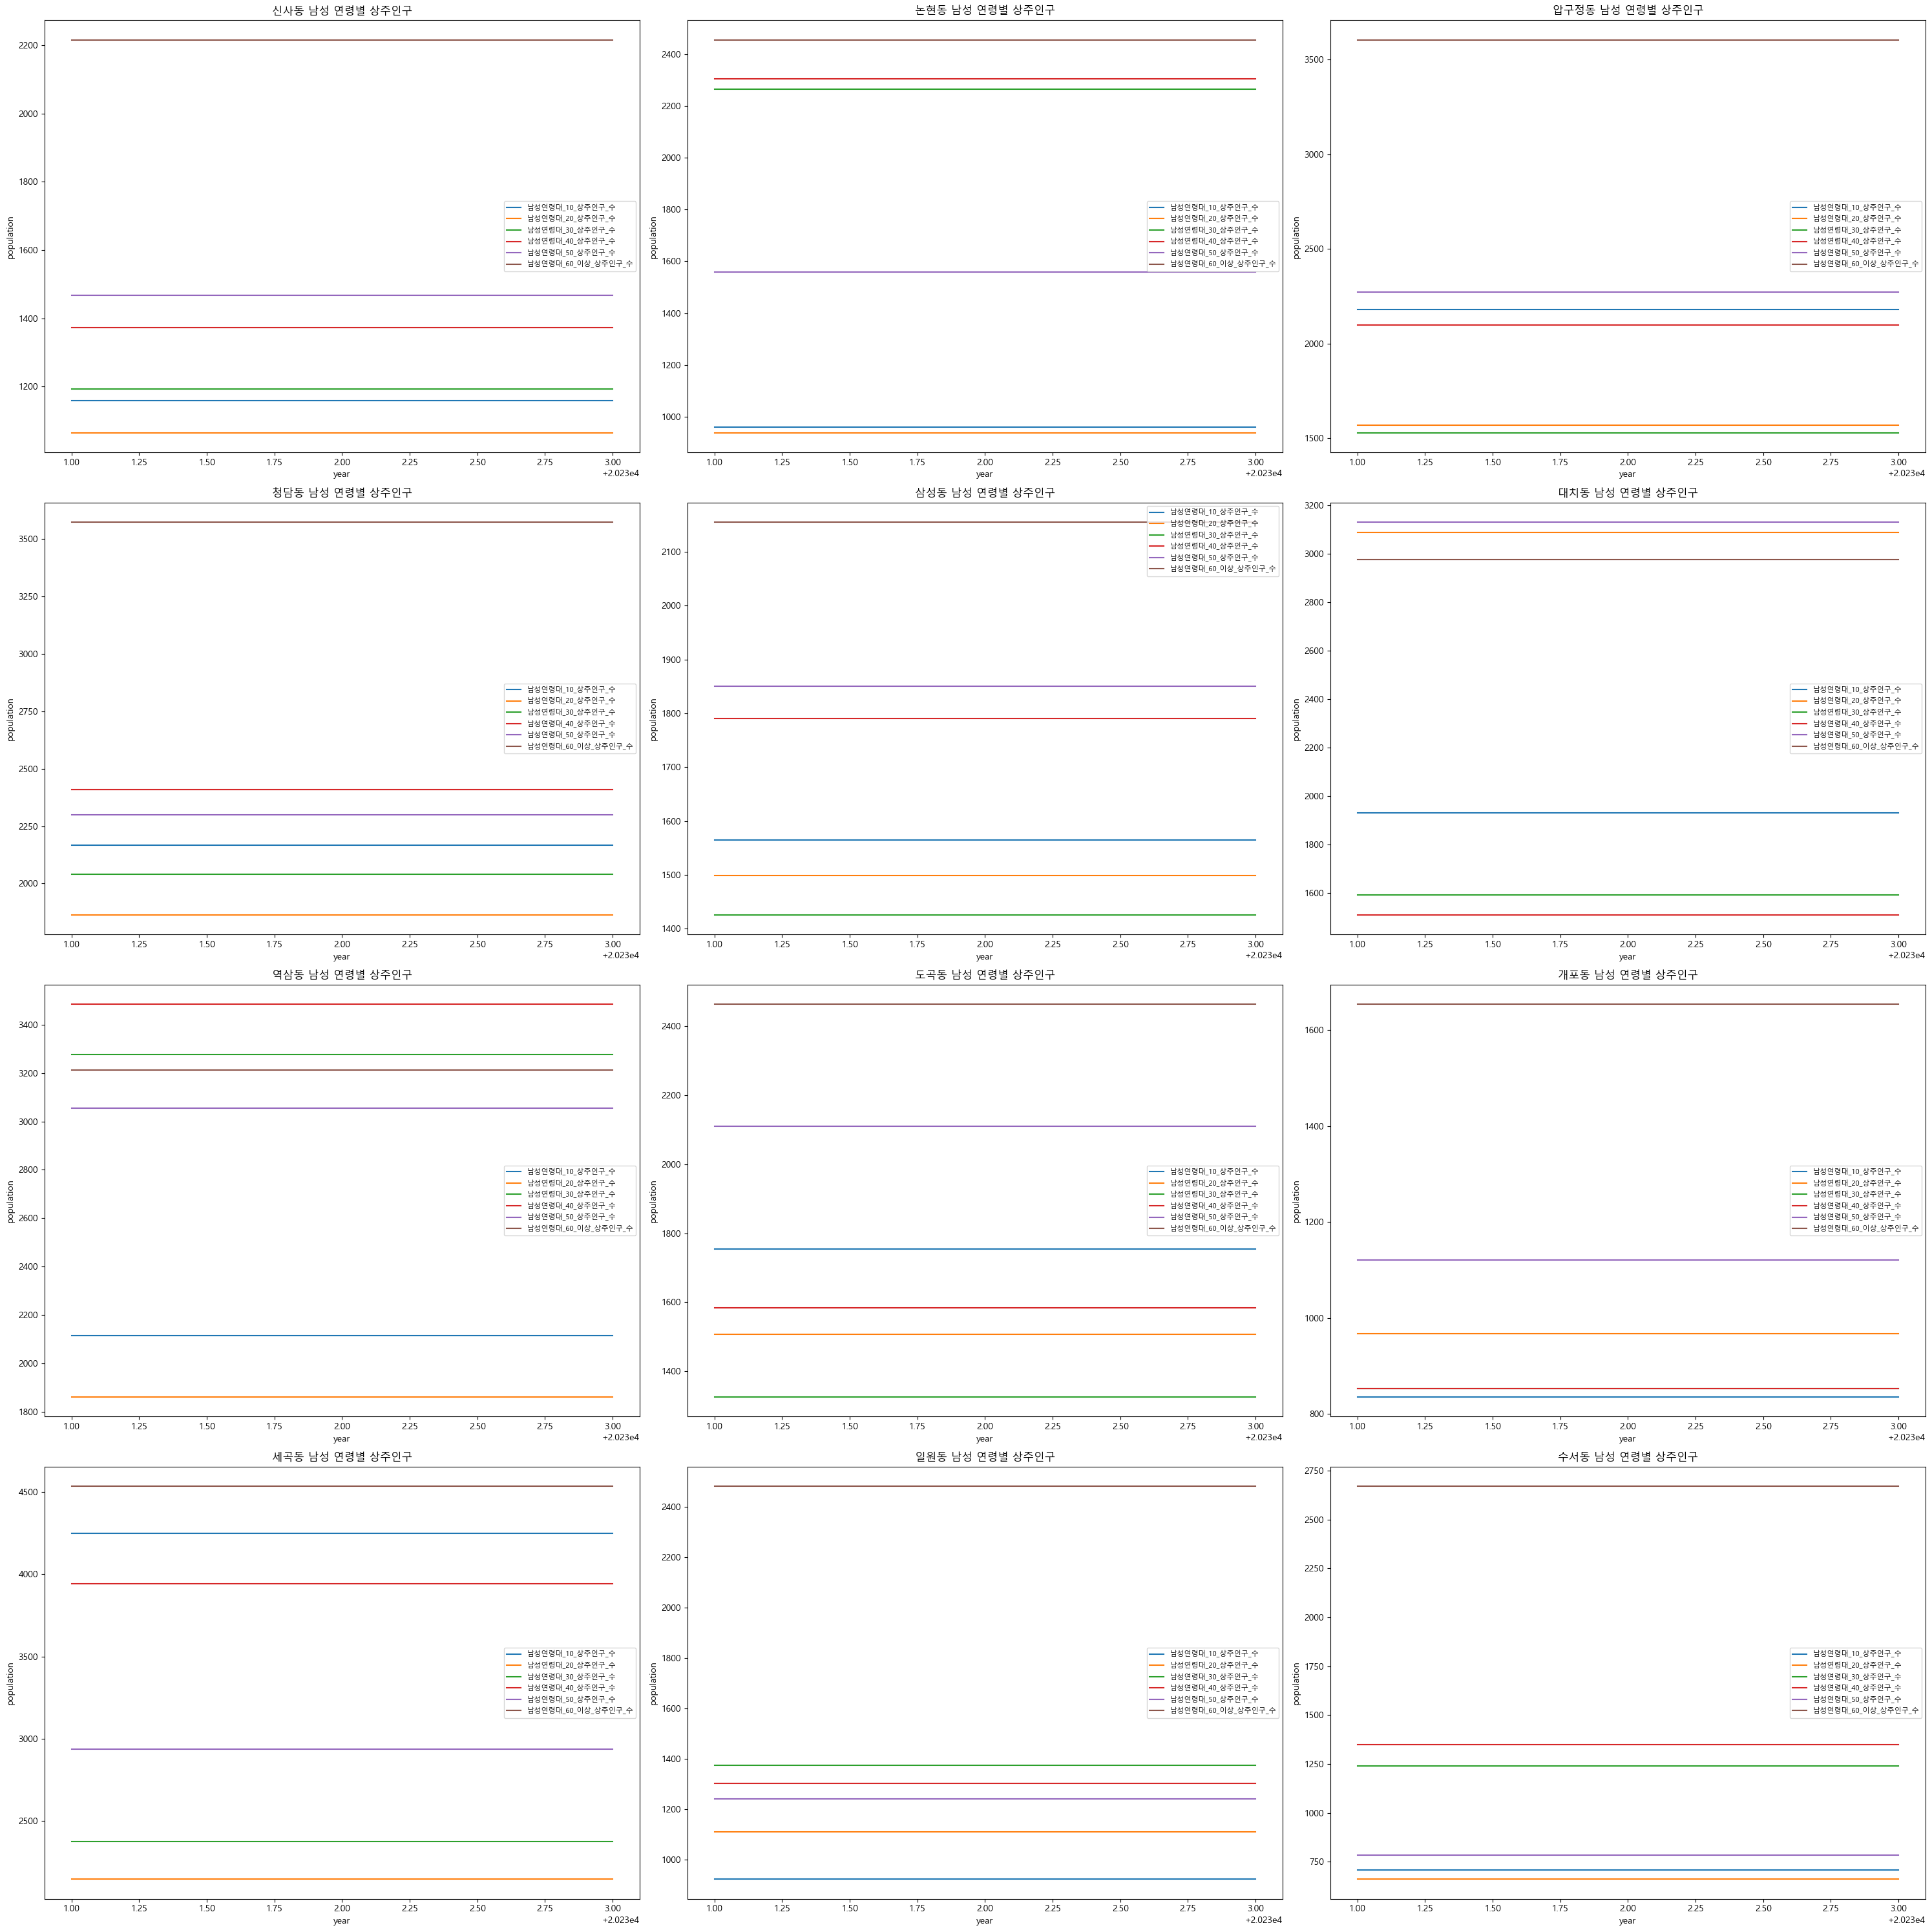

In [63]:
# 남성연령별 상주인구 그래프



fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30, 30))

dong_n = ['신사동', '논현동', '압구정동', '청담동', '삼성동', '대치동', '역삼동', '도곡동', '개포동', '세곡동',
       '일원동', '수서동']
    
    
for i, dong_data in enumerate(find_dong(dong_n)):
    row = i // 3
    col = i % 3
    
    name = dong_data.index.get_level_values('행정동')[0]
    
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['남성연령대_10_상주인구_수'], label='남성연령대_10_상주인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['남성연령대_20_상주인구_수'], label='남성연령대_20_상주인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['남성연령대_30_상주인구_수'], label='남성연령대_30_상주인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['남성연령대_40_상주인구_수'], label='남성연령대_40_상주인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['남성연령대_50_상주인구_수'], label='남성연령대_50_상주인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['남성연령대_60_이상_상주인구_수'], label='남성연령대_60_이상_상주인구_수')

    axes[row, col].set_title(name + ' 남성 연령별 상주인구')
    axes[row, col].set_xlabel('year')
    axes[row, col].set_ylabel('population')
    axes[row, col].legend(loc='best', fontsize=8, fancybox=True)
    
plt.tight_layout()
plt.show()